### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지 import
import statsmodels.api as sm # 안쓸껄??
import sklearn as sk

##### 한글문제 여전히 발생  - 이 아래 두개의 쉘은 패스할 것 

In [4]:
from matplotlib import rc
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus']=False

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [5]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmtt10',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'cmex10',
 'DejaVu Serif',
 'cmsy10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'cmss10',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmmi10',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'cmr10',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmb10',
 'DejaVu Serif',
 'STIXGeneral',
 'Myriad Arabic',
 'MSugiJeong',
 'Comic Sans MS',
 'Tekton Pro',
 'Adobe Caslon Pro',
 'Myriad Hebrew',
 'Lithos Pro',
 'Blippo Blk BT',
 'Cambria',
 'Kozuka Mincho Pro',
 'HYgsrB',
 'Adobe Fangsong Std',
 'Franklin Gothic Medium',
 'Georgia',
 'Microsoft New Tai Lue',
 'Giddyup Std',
 'Letter Gothic Std',
 '??????',
 'HYcysM',
 'MJemokGot

## k-최근접 이웃 회귀

### 데이터 준비

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

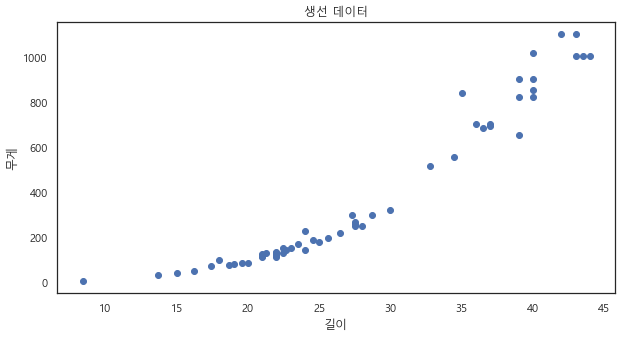

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(perch_length, perch_weight)
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [11]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [12]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [13]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [14]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
# test_array = test_array.reshape(2, 3)

In [15]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [16]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정 계수 ($ R^2$)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [19]:
knr.score(test_input, test_target)

0.992809406101064

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


### 과대적합 vs 과소적합

In [22]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [23]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [24]:
print(knr.score(test_input, test_target))

0.9746459963987609


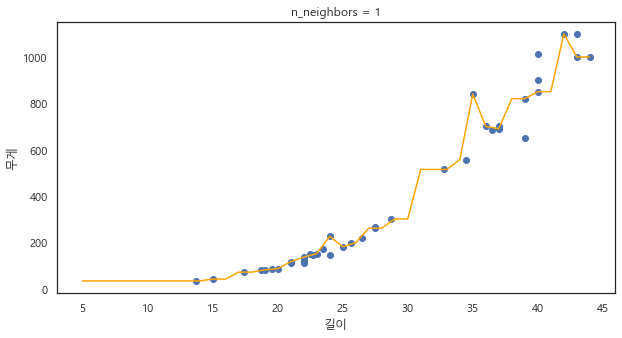

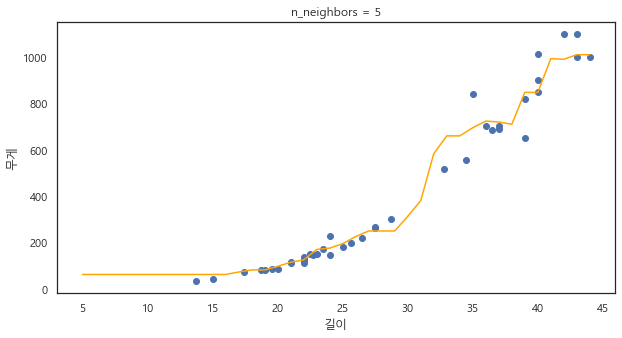

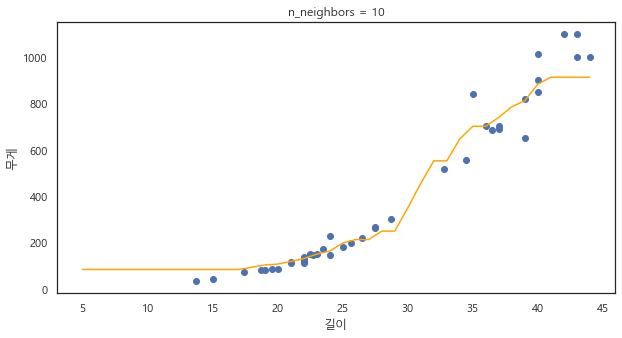

In [25]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction, color='orange')
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.show()